<a href="https://colab.research.google.com/github/sai-raman/student-grade-prediction/blob/main/student_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Factors that might impact the student grade**






```
Id                                    
Age
Gender
Campus 
Reason
Admission Type
Branch
Family support
1-1 mid percentage
1-1 semester percentage
 1-2 mid percentage
1-2 semester percentage
2-2- mid percentage
2-2 semester percentage
3-1 mid percentage
3-1 semester percentage
3-2 mid percentage
3-2 semester percentage
Backlogs
Technical skills
Attendance
Events
Final Grade

```






Dataset is taken from **UCI Machine Learning Repository**:  https://archive.ics.uci.edu/ml/datasets/student+performance

Features in the dataset:



```
school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex: student's sex (binary: 'F' - female or 'M' - male)

age: student's age (numeric: from 15 to 22)

address: student's home address type (binary: 'U' - urban or 'R' - rural)

famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian: student's guardian (nominal: 'mother', 'father' or 'other')

traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures: number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup: extra educational support (binary: yes or no)

famsup: family educational support (binary: yes or no)

paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities: extra-curricular activities (binary: yes or no)

nursery: attended nursery school (binary: yes or no)

higher: wants to take higher education (binary: yes or no)

internet: Internet access at home (binary: yes or no)

romantic: with a romantic relationship (binary: yes or no)

famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime: free time after school (numeric: from 1 - very low to 5 - very high)

goout: going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health: current health status (numeric: from 1 - very bad to 5 - very good)

absences: number of school absences (numeric: from 0 to 93)

G1: first period grade (numeric: from 0 to 20)

G2: second period grade (numeric: from 0 to 20)

G3: final grade (numeric: from 0 to 20)
```



In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


In [ ]:
df = pd.read_csv('./drive/My Drive/colab_dataset/student-mat.csv')

In [ ]:
df.shape

(395, 33)

In [ ]:
df.head()

,sex,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,1,0,0,4,4,3,0,0,2,2,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6,5.666667,0
1,1,0,1,1,1,3,4,1,1,2,0,1,0,1,0,5,3,3,1,1,3,4,5,5,6,5.333333,0
2,1,1,1,1,1,3,4,0,1,2,3,0,0,1,0,4,3,2,2,3,3,10,7,8,10,8.333333,0
3,1,0,1,4,2,1,2,0,1,3,0,1,1,1,1,3,2,2,1,1,5,2,15,14,15,14.666667,1
4,1,0,1,3,3,4,4,1,1,2,0,1,0,0,0,4,3,2,1,2,5,4,6,10,10,8.666667,0


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [ ]:
# Average grade for the 3 years

df['GAvg'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [ ]:
def define_grade(df):
    # Create a list to store the data
    grades = []

    # For each row in the column,
    for row in df['GAvg']:
        # if more than a value,
        if row >= (0.9 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('A')
        # else, if more than a value,
        elif row >= (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('B')
        # else, if more than a value,
        elif row < (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('C')   
    # Create a column from the list
    df['grades'] = grades
    return df

In [ ]:
df = define_grade(df)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667,C
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333,C
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333,C
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667,B
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667,C


In [ ]:
df.drop(["school","age","address","reason","schoolsup","paid","nursery","higher"], axis=1, inplace=True)

In [ ]:
df.describe()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [ ]:
# for yes / no values:
d = {'yes': 1, 'no': 0}
df['famsup'] = df['famsup'].map(d)
df['activities'] = df['activities'].map(d)
df['internet'] = df['internet'].map(d)
df['romantic'] = df['romantic'].map(d)

In [ ]:
# map the sex data
d = {'F': 1, 'M': 0}
df['sex'] = df['sex'].map(d)

# map the famili size data
d = {'LE3': 1, 'GT3': 0}
df['famsize'] = df['famsize'].map(d)

# map the parent's status
d = {'T': 1, 'A': 0}
df['Pstatus'] = df['Pstatus'].map(d)

# map the parent's job
d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
df['Mjob'] = df['Mjob'].map(d)
df['Fjob'] = df['Fjob'].map(d)


# map the guardian df
d = {'mother': 0, 'father': 1, 'other': 2}
df['guardian'] = df['guardian'].map(d)

# map the grades df
d = {'C': 0, 'B': 1, 'A': 2}
df['grades'] = df['grades'].map(d)

In [ ]:
df.nunique()

sex            2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
guardian       3
traveltime     4
studytime      4
failures       4
famsup         2
activities     2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
GAvg          54
grades         3
dtype: int64

In [ ]:
student_features = df.columns.tolist()
student_features.remove('grades') 
student_features.remove('GAvg') 
student_features.remove('G1') 
student_features.remove('G2') 
student_features.remove('G3') 
student_features

['sex',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'famsup',
 'activities',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [ ]:
X = df[student_features].copy()
X.columns

Index(['sex', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian',
       'traveltime', 'studytime', 'failures', 'famsup', 'activities',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences'],
      dtype='object')

In [ ]:
y=df[['grades']].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)


In [ ]:
X_train

,sex,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famsup,activities,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
291,1,0,1,4,3,1,2,0,1,3,0,1,0,1,0,4,2,2,1,2,3,0
21,0,0,1,4,4,1,1,1,1,1,0,1,0,1,0,5,4,2,1,1,5,0
324,1,1,1,0,2,3,3,1,2,3,0,0,0,1,0,3,3,3,2,3,2,0
204,1,0,1,2,2,2,2,0,2,4,0,1,1,1,0,5,3,5,1,1,5,6
389,1,0,1,1,1,4,4,0,2,2,1,0,1,0,0,1,1,1,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1,0,0,2,2,3,3,1,1,2,1,1,0,1,1,3,3,1,1,2,4,0
359,1,1,1,1,1,3,2,1,2,3,0,0,0,1,0,5,3,2,1,1,4,0
323,1,0,1,3,1,2,2,1,1,3,0,1,0,1,0,3,4,3,2,3,5,1
280,0,1,0,4,1,2,4,0,2,1,0,0,1,1,1,4,5,4,2,4,5,30


In [ ]:
y_train

,grades
291,1
21,1
324,1
204,0
389,0
...,...
343,0
359,1
323,1
280,0


In [ ]:
X_tra

# **Classifier 1 : Decision Tree** 


In [ ]:
grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
grade_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

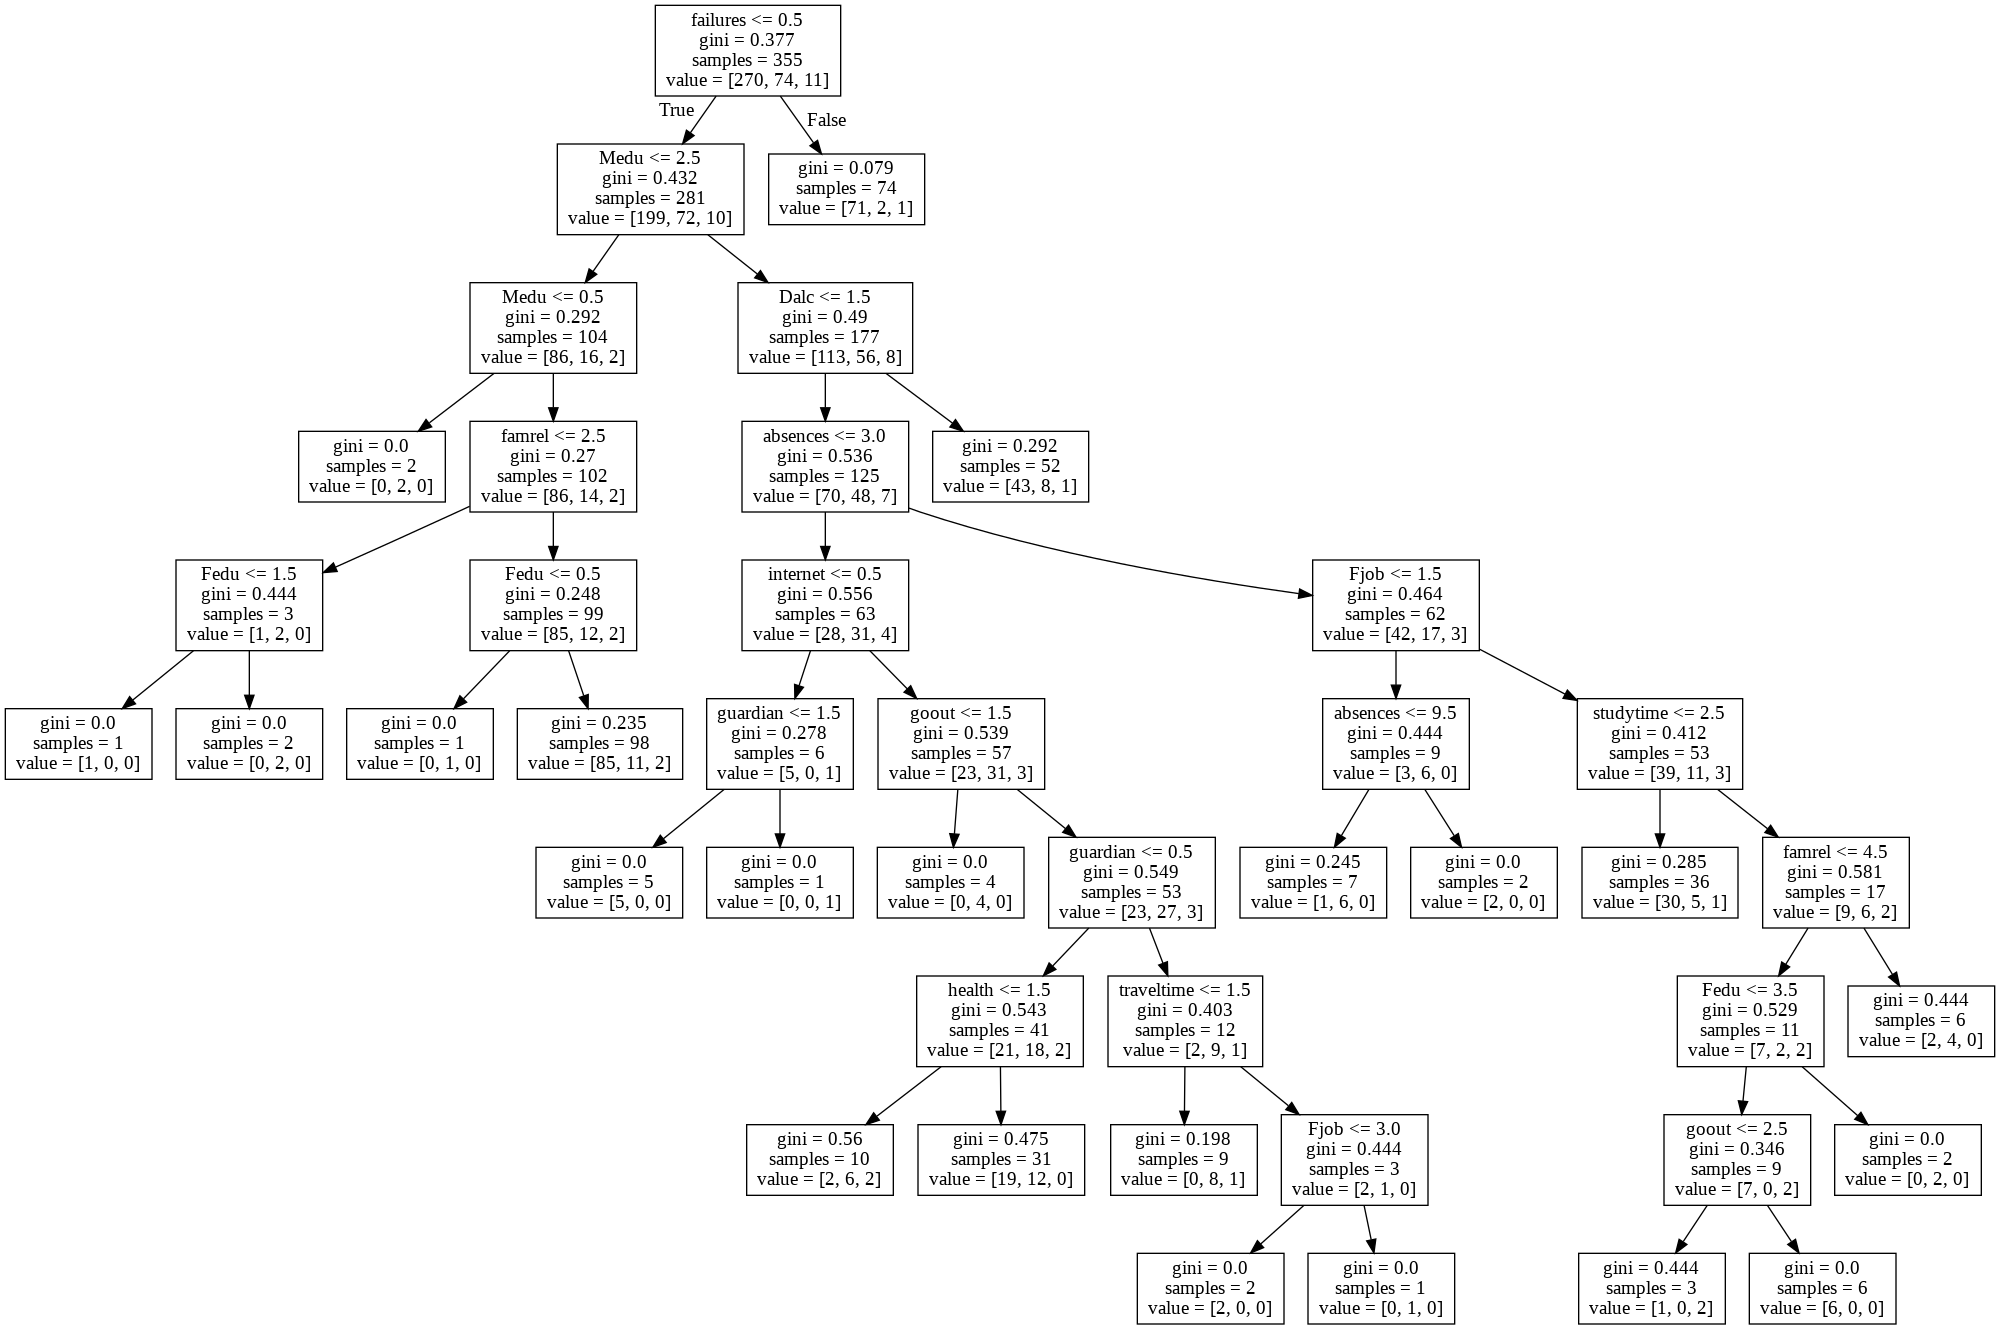

In [ ]:
dot_data = StringIO()  
tree.export_graphviz(grade_classifier, out_file=dot_data,  
                         feature_names=student_features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [ ]:
predictions = grade_classifier.predict(X_test)

In [ ]:

from sklearn import metrics

print("Accuracy% :",(metrics.accuracy_score(y_test, predictions))*100)

Accuracy% : 77.5


# **Classifier 2: Naive Bayes**

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train.values.reshape(-1,))


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predicted= model.predict(X_test)
predicted

array([1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0])

In [ ]:
from sklearn import metrics
print("Accuracy% :",(metrics.accuracy_score(y_test, predicted))*100)

Accuracy% : 40.0
